![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/classification_covidnet.ipynb)

# Classification on CovidNet 

This notebook provides and example of Gesund Validation with Object Detection

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Dataset Name: [TCIA-MIDRC-RIC-1C](https://app.gesund.ai/data/dataset-details/Dataset3/overview)

To download the required JSON files, run the following commands in a Jupyter notebook cell


In [ ]:
# Classification Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/gesund_custom_format/annotation.json

# Classification Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/gesund_custom_format/prediction.json

# Classification Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/test_class_mappings.json

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `classification validation` on your data. 

In [18]:
from gesund import Validation
from gesund.core._managers.metric_manager import metric_manager
from gesund.core._managers.plot_manager import plot_manager

In [ ]:
import os

data_dir = "./tests/_data/classification"
problem_type = "classification"

plot_configs = [
    ({"problem_type": "classification"}, "most_confused", None),
    ({"problem_type": "classification"}, "auc", None),
    ({"problem_type": "classification"}, "confusion_matrix", None),
    ({"problem_type": "classification"}, "lift_chart", None),
    ({"problem_type": "classification"}, "stats_tables", None),
    ({"problem_type": "classification"}, "top_losses", None),
    ({"problem_type": "classification"}, "threshold", None),
]
plot_config_dict = {f"config_{i}": config for i, config in enumerate(plot_configs)}

plots_dir = "./plots"
os.makedirs(plots_dir, exist_ok=True)

validator = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    problem_type=problem_type,
    data_format="json",
    json_structure_type="gesund",
    plot_config=plot_config_dict,
    cohort_args={"selection_criteria": "random"},
    metric_args={"threshold": [0.25, 0.5, 0.75]},
)
validation_results = validator.run()

for config_key, (plot_config, metric_name, cohort_id) in plot_config_dict.items():
    print(f"Generating plot for {metric_name} with config {config_key}")
    plot_path = os.path.join(plots_dir, f"{metric_name}.png")
    validation_results.plot(
        metric_name=metric_name, save_plot=True, cohort_id=cohort_id)

#### Explanation of plot config values and keys

<hr />


The plot config dictionary outlines various plots and metrics you might want to generate for a classification problem, providing specific details for each plot type and associated metrics.

`performance_by_threshold`:
- graph_type: A string indicating the type of graph to be used (e.g., "graph_1").
- metrics: A list of performance metrics that will be calculated and plotted (e.g., "F1", "Sensitivity", "Specificity", "Precision", "FPR", "FNR").
- threshold: A numerical value used to set a threshold for the performance metrics.

`confusion_matrix`:
    This key is present but currently contains an empty dictionary, indicating that no specific configuration parameters are provided yet.

`most_confused_bar`:
    This key is present but currently contains an empty dictionary, indicating that no specific configuration parameters are provided yet.

`lift_chart`:
    This key is present but currently contains an empty dictionary, indicating that no specific configuration parameters are provided yet.

`auc`:
    This key is present but currently contains an empty dictionary, indicating that no specific configuration parameters are provided yet.

`top_losses`:
    This key is present but currently contains an empty dictionary, indicating that no specific configuration parameters are provided yet.

`stats_table`:
    This key is present but currently contains an empty dictionary, indicating that no specific configuration parameters are provided yet.
<hr />

In [9]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [10]:
def load_image(image_file):
    img_path = os.path.join(plots_dir, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

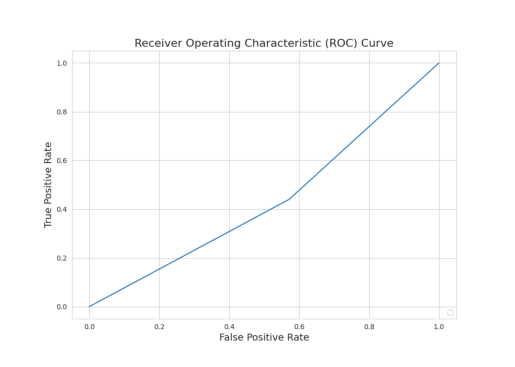

In [11]:
load_image("auc.png")

`Auc` Roc Curve This ROC curve compares how well a diagnostic test can distinguish between normal and pneumonia cases

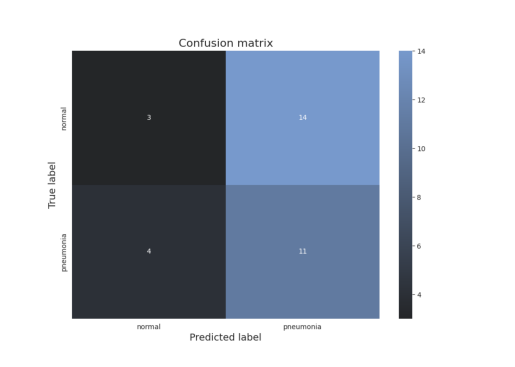

In [12]:
load_image("confusion_matrix.png")

`Confusion Matrix` Confusion Matrix Plot generates a confusion matrix for evaluating the performance of a classification algorithm.

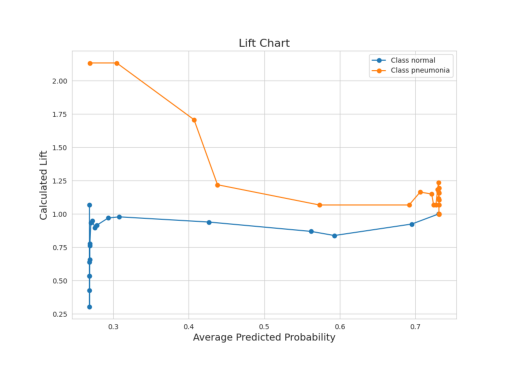

In [13]:
load_image("lift_chart.png")

`Lıft Chart` The chart displays the performance comparison between normal and pneumonia classes, where the normal class, demonstrates overall better performance with an upward trend compared to the relatively stable pneumonia class.

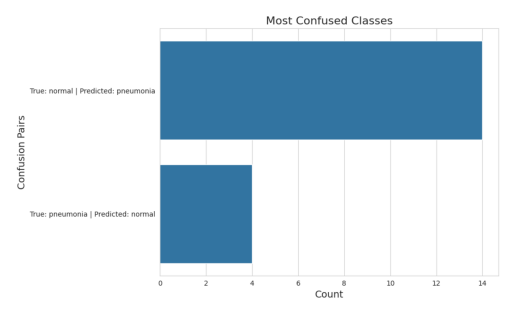

In [14]:
load_image("most_confused.png")

`Most Confused Classes` The confusion chart shows that the model had more difficulty classifying normal cases compared to pneumonia cases, indicating a higher rate of misclassification for normal samples.

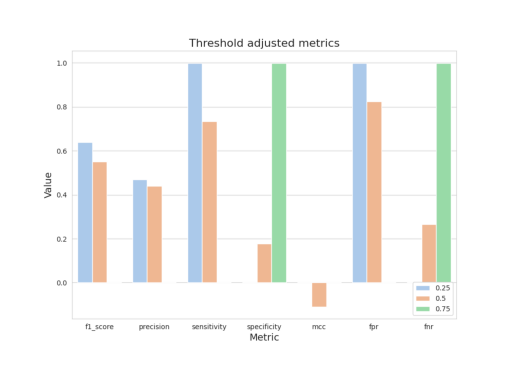

In [15]:
load_image("threshold.png")

`Performance by Threshold` The chart presents different model performance metrics, illustrating various measurements used to evaluate the classification model's effectiveness.

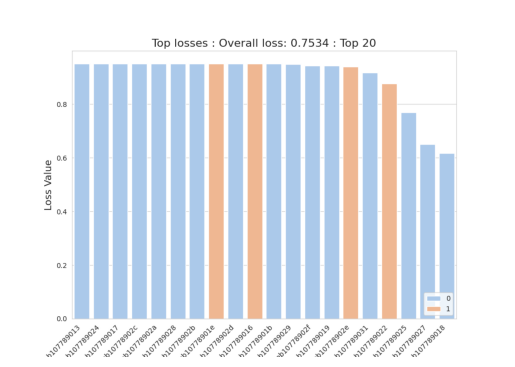

In [16]:
load_image("top_losses.png")

`Top Losses` The chart presents displays examples where the model had the highest loss values.

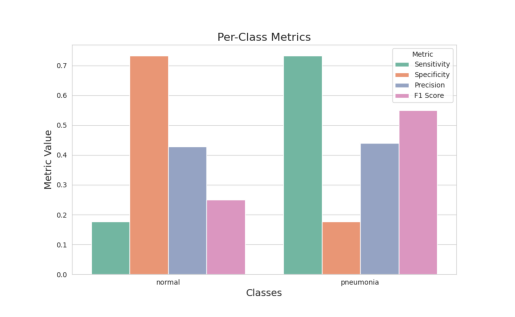

In [17]:
load_image("plot_1.png")

`Stats Table` The chart presents displays creates a table visualization of per-class performance statistics.